* L'arborescence du projet doit etre le suivant :
   
    - LU3IN013/
        - fichierSerialiser/
            - serie1
            ...
            
        - base_de_donner/
            - serie1/
                - 01/
                    - episodes1.txt
                      ...
                  ...
              ...

        - projet/
            - preTraitement.py
            - utils.py
            - save.py
            - classifiers.py
            - scrapNplot.py

        - jupyter.ipynb
   

In [1]:
# Importation de nos librairie :
# La ligne suivante permet de préciser le chemin 
import sys
sys.path.append('./')   

#importation de la librairie projet
import projet 

# Importation des fonctions de pretraitement
from projet import preTraitement as pt

# importation des fonctions de serialisation de fichier
from projet import save as sv

# importation de fonctions utils
from projet import utils as ut

# importation des biblioteques de classifieurs
from projet import classifiers as cl

 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

<h3>ETAPE 0</h3>

Pour ajouter des series au fichier serialiser :
- Creer un repertoire contenant les series et indiquer le chemin vers ce repertoire 
    - -> exemple "./test10"
- Appeler la fonction qui va extraire les series 
    - -> exemple "resultat = pt.extractionSeries("./test8")"
- Sauvegarder le resultat a l'aide de notre biblioteque de sauvegarde baser sur pickle 
    - -> exemple sv.sauvegardeFichier("./fichierSerialiser/serie_debut_fin",resultat) 

<h2>PROTOCOLE EXPERIMENTALE 1</h2>

ETAPE 1 : Extraction des données <br/>
ETAPE 2 : Preparer les données pour le tfidf <br/>
ETAPE 3 : Application tfidf <br/>
ETAPE 4 : Appliquer une fonction de distance sur les données etapes 3 <br/>
ETAPE 5 : Recuperer les noms des series <br/>
ETAPE 6 : Affichage de la HeatMap <br/>

<h3>ETAPE 1</h3>

In [ ]:
#(ppt,vvt,kkt) = pt.extractionSeries("./test8") 
#sv.sauvegardeFichier("./fichierSerialiser/serie_29_42",(ppt,vvt,kkt))

In [4]:
serie_1_10 = sv.lectureFichier("./fichierSerialiser/serie_1_10")
serie_11_27 = sv.lectureFichier("./fichierSerialiser/serie_11_27")
serie_29_42 = sv.lectureFichier("./fichierSerialiser/serie_29_42")
serie_1_42 = sv.lectureFichier("./fichierSerialiser/serie_1_42") # Dataframe DES SERIES REDUITES ne pas utiliser faux

<h3>ETAPE 2<h3>

In [111]:
stri = ut.constitue_serie_tdidf(serie_1_10[0]) #+ serie_11_27[0] + serie_29_42[0]

<h3>ETAPE 3<h3>

In [112]:
pd_tfidf = cl.TFIDF(stri)

<h3>ETAPE 4</h3>

In [ ]:
matrice_distance = cl.distance_cosine(pd.DataFrame(pd_tfidf))

<h3>ETAPE 5</h3>

In [ ]:
liste_nom = serie_1_10[1]  #+ serie_11_27[1] + serie_29_42[1]   

<h3>ETAPE 6</h3>

In [ ]:
ut.afficheHeatmap(matrice_distance,liste_nom)

<h2>PROTOCOLE EXPERIMENTALE 2</h2>

ETAPE 1 : Extraction des données <br/>
ETAPE 2 : Preparer les données pour le tfidf <br/>
ETAPE 3 : Application tfidf <br/>
ETAPE 4 : Appliquer une classification non superviser de clustering (exemple Kmeans) et recuperer les valeurs de clustering <br/>
ETAPE 5 : Appliquer une fonction de reduction de dimmensions <br/>
ETAPE 6 : Affichage en 2D ou 3D <br/>

Pour les etapes 1,2,3 voir plus hauts .

<h3>ETAPE 4</h3>

In [118]:
Y = cl.Kmeans(serie_1_42,5)
verification = cl.liste_nom_prediction(liste_nom,Y)

<h3>ETAPE 5</h3>

In [131]:
X2 = cl.reduction_dimension_pca(serie_1_42,dim_out=2)
X3 = cl.reduction_dimension_tsne(serie_1_42,dim_out=2,perplexity_=5)
X4 = cl.reduction_dimension_mds(cl.distance_cosine(serie_1_42),dim_out=2)

<h3>ETAPE 6</h3>

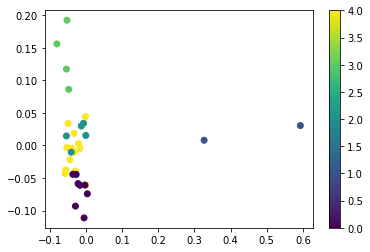

In [132]:
ut.affiche2dScatter(X2,Y)

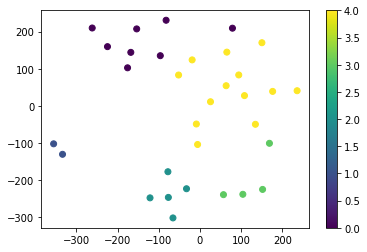

In [133]:
ut.affiche2dScatter(X3,Y)

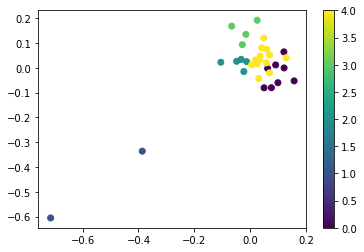

In [134]:
ut.affiche2dScatter(X4,Y)

Exemple en 3D

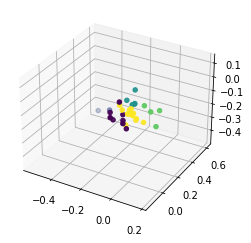

In [135]:
X3D = cl.reduction_dimension_mds(cl.distance_cosine(serie_1_42),dim_out=3)
ut.affiche3dScatter(X3D,Y)